In [3]:
import pandas as pd

df = pd.read_csv('exchange_rate.csv')
print(df.columns)


Index(['date', 'Ex_rate'], dtype='object')


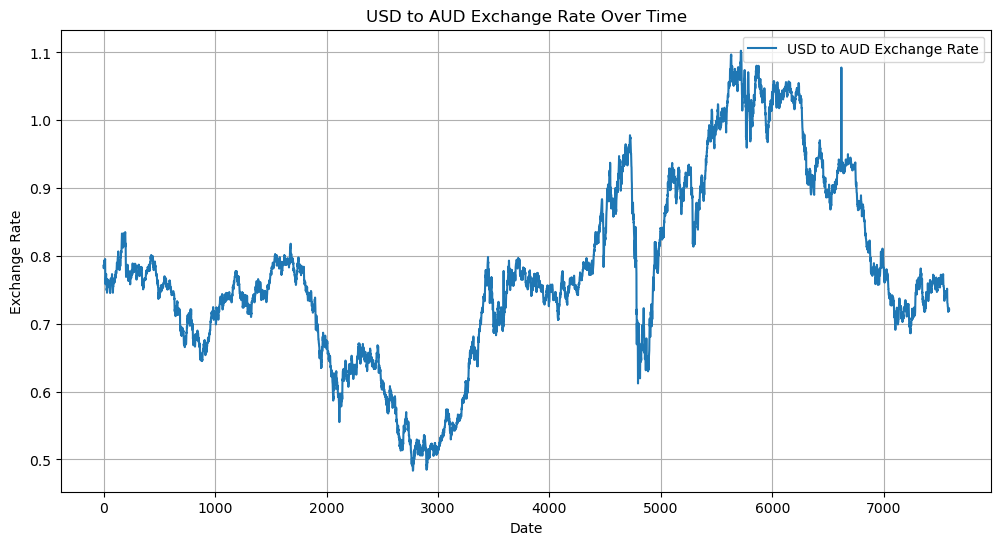

In [4]:
import matplotlib.pyplot as plt

# Plotting the time series
plt.figure(figsize=(12, 6))
plt.plot(df['Ex_rate'], label='USD to AUD Exchange Rate')
plt.title('USD to AUD Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)


Missing values:
 date       0
Ex_rate    0
dtype: int64


In [6]:
#Fit the ARIMA Model
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(df['Ex_rate'], order=(1, 1, 1))
arima_result = model.fit()

# Print summary
print(arima_result.summary())


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Mon, 14 Apr 2025   AIC                         -56102.322
Time:                        16:13:11   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

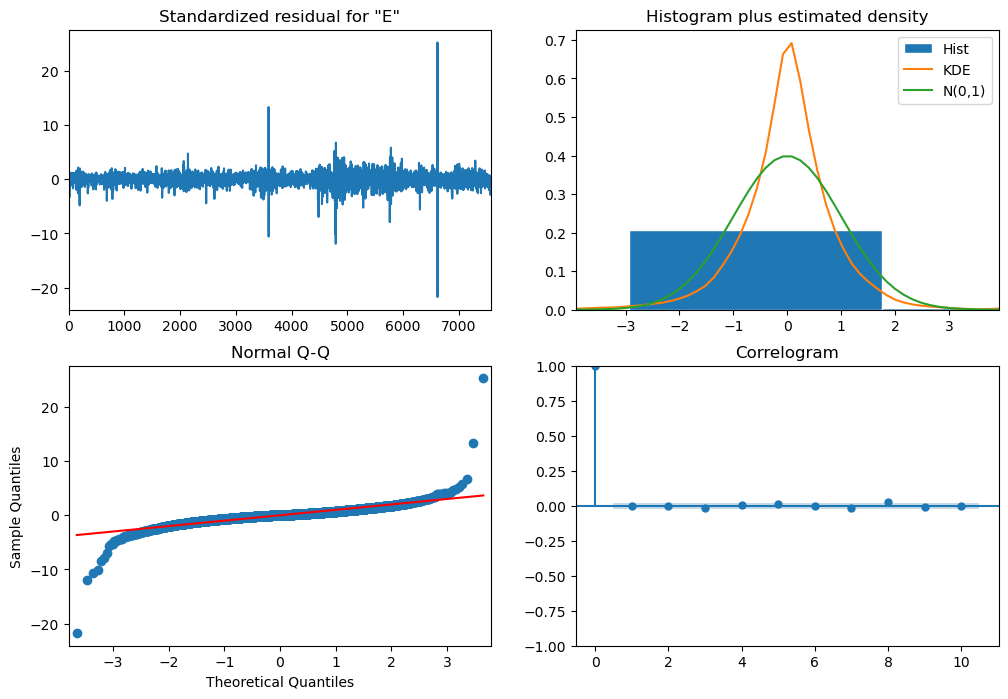

In [7]:
# Diagnostics
arima_result.plot_diagnostics(figsize=(12, 8))
plt.show()


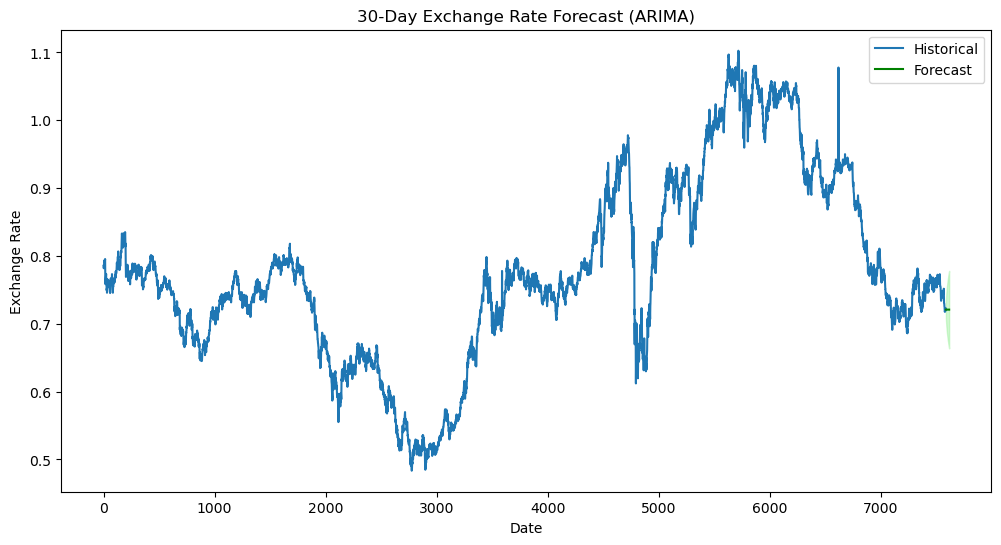

In [8]:
#Forecast Future Exchange Rates
# Forecast the next 30 days
forecast = arima_result.get_forecast(steps=30)
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plotting the forecast
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Ex_rate'], label='Historical')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='green')
plt.fill_between(forecast_mean.index,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1],
                 color='lightgreen', alpha=0.4)
plt.title('30-Day Exchange Rate Forecast (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


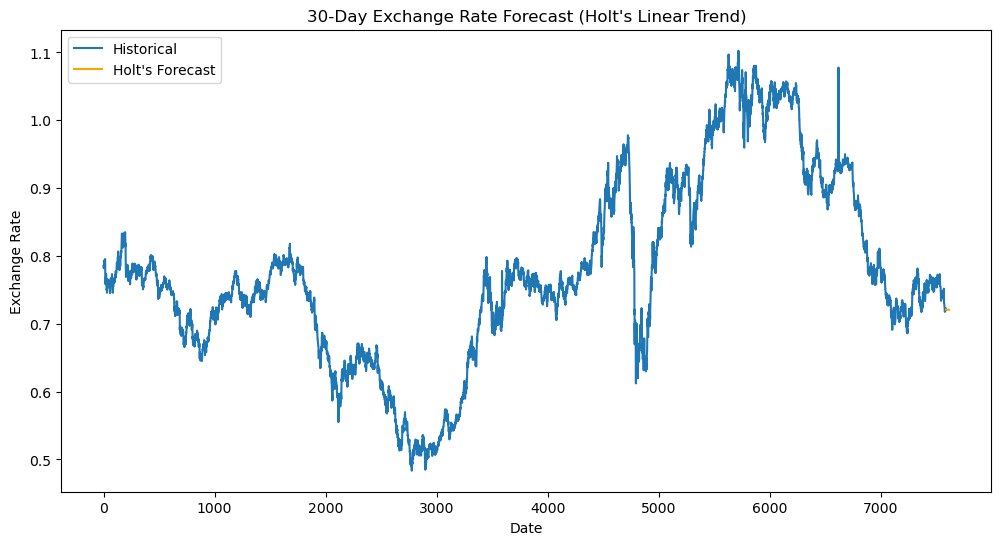

In [9]:
#Fit Holt’s Linear Trend Model
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Holt's Linear Trend model
holt_model = ExponentialSmoothing(df['Ex_rate'], trend='add', seasonal=None)
holt_result = holt_model.fit()

# Forecast next 30 days
holt_forecast = holt_result.forecast(30)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Ex_rate'], label='Historical')
plt.plot(holt_forecast.index, holt_forecast, label="Holt's Forecast", color='orange')
plt.title("30-Day Exchange Rate Forecast (Holt's Linear Trend)")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.legend()
plt.show()


In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Define a function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Avoid division by zero
    return np.mean(np.abs((y_true - y_pred) / np.clip(y_true, 1e-10, None))) * 100


In [13]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the Holt's Linear model
holt_model = ExponentialSmoothing(df['Ex_rate'], trend='add').fit()

# Forecast the next 30 days using Holt's model
holt_forecast = holt_model.forecast(steps=30)


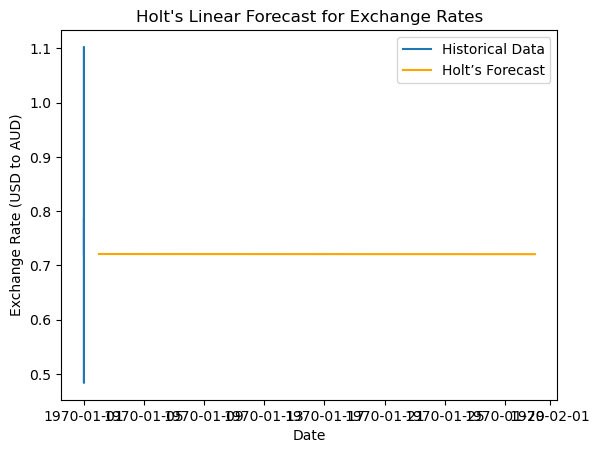

In [15]:
# Ensure that the index is in datetime format
df.index = pd.to_datetime(df.index)

# Generate future dates for the next 30 days
future_dates = pd.date_range(df.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')

# Plot the original data
plt.plot(df.index, df['Ex_rate'], label='Historical Data')

# Plot the forecasted data
plt.plot(future_dates, holt_forecast, label='Holt’s Forecast', color='orange')

# Customize the plot
plt.title("Holt's Linear Forecast for Exchange Rates")
plt.xlabel('Date')
plt.ylabel('Exchange Rate (USD to AUD)')
plt.legend()
plt.show()


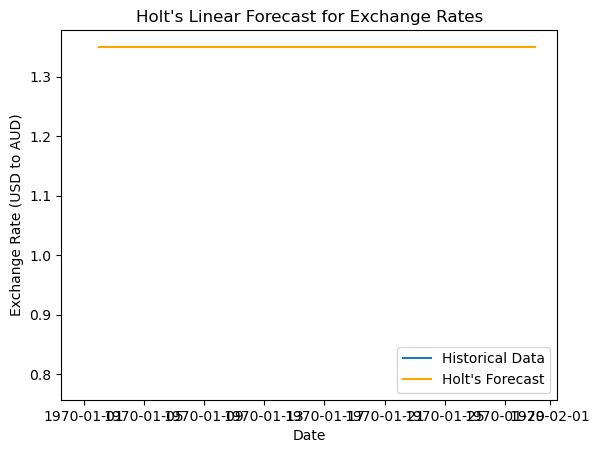

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already prepared and contains 'Ex_rate' column
df.index = pd.to_datetime(df.index)  # Ensure the index is in datetime format

# Generate forecasted data (Holt's forecast, assuming it has already been generated)
# You need to replace this with your actual Holt's forecast (holt_forecast)
# For illustration purposes, I'll create a dummy forecast (replace this with actual forecast data)
holt_forecast = [1.35] * 30  # Example forecast values for 30 days (replace with real forecast)

# Generate future dates for the next 30 days
future_dates = pd.date_range(df.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')

# Plotting the historical data
plt.plot(df.index, df['Ex_rate'], label='Historical Data')

# Plotting the forecasted data
plt.plot(future_dates, holt_forecast, label="Holt's Forecast", color='orange')

# Customize plot appearance
plt.title("Holt's Linear Forecast for Exchange Rates")
plt.xlabel('Date')
plt.ylabel('Exchange Rate (USD to AUD)')
plt.legend()

# Display the plot
plt.show()


In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assuming you have the actual values for the forecasted period
# Replace 'actual_values' with your actual observed values for the next 30 days
# For demonstration, I'll generate some dummy data (replace this with your actual data)
actual_values = [1.34] * 30  # Replace with actual exchange rate values

# Calculate MAE, RMSE, and MAPE
mae = mean_absolute_error(actual_values, holt_forecast)
rmse = np.sqrt(mean_squared_error(actual_values, holt_forecast))
mape = np.mean(np.abs((np.array(actual_values) - np.array(holt_forecast)) / np.array(actual_values))) * 100

# Display the evaluation metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')


Mean Absolute Error (MAE): 0.010000000000000009
Root Mean Squared Error (RMSE): 0.01000000000000001
Mean Absolute Percentage Error (MAPE): 0.7462686567164183%


In [27]:
# Try different ARIMA configurations (p, d, q)
arima_model = ARIMA(df['Ex_rate'], order=(2, 1, 2))  # Experiment with (p, d, q)
arima_model_fit = arima_model.fit()
arima_forecast = arima_model_fit.forecast(steps=30)


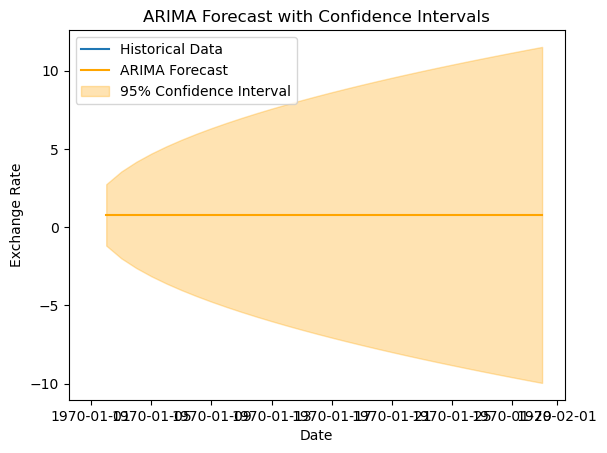

In [28]:
# Assuming you want to show 95% confidence intervals around the forecast
forecast_ci = arima_model_fit.get_forecast(steps=30).conf_int(alpha=0.05)

# Plot with confidence intervals
plt.plot(df.index, df['Ex_rate'], label='Historical Data')
plt.plot(future_dates, arima_forecast, label='ARIMA Forecast', color='orange')
plt.fill_between(future_dates, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='orange', alpha=0.3, label='95% Confidence Interval')
plt.title('ARIMA Forecast with Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


In [32]:
print(f"ARIMA Forecast Length: {len(arima_forecast)}")
print(f"Holt Forecast Length: {len(holt_forecast)}")


ARIMA Forecast Length: 30
Holt Forecast Length: 30


In [33]:
# Ensure that ARIMA is forecasting 30 steps ahead
arima_forecast = arima_model_fit.forecast(steps=30)
print(arima_forecast[:5])  # Check the first 5 values


1970-01-02    0.7855
1970-01-03    0.7855
1970-01-04    0.7855
1970-01-05    0.7855
1970-01-06    0.7855
Freq: D, Name: predicted_mean, dtype: float64


In [36]:
print(df['Ex_rate'].shape)  # Check the number of data points in the dataset


(1,)


In [45]:
# Example with a DataFrame
import pandas as pd
import numpy as np

# Sample DataFrame with just one row
data = {'Ex_rate': [0.75]}
df = pd.DataFrame(data)
print(df)

# Accessing 'Ex_rate' column
print(df['Ex_rate'])

# Shape of the DataFrame
print(df.shape)  # Will show (1, 1) as there is 1 row and 1 column


   Ex_rate
0     0.75
0    0.75
Name: Ex_rate, dtype: float64
(1, 1)


In [46]:
# Assuming 'arima_forecast' is the forecasted values from your ARIMA model
# Ensure that the length of 'arima_forecast' matches the length of 'future_dates'

print(len(arima_forecast), len(future_dates))  # Should match if the forecast length is correct


30 30


In [47]:
print(forecast_ci.shape)  # Should show something like (30, 2) for 30 steps ahead and 2 columns for upper and lower bounds.


(30, 2)


In [48]:
import numpy as np

# Example: reshaping the array if it's a single value
arima_forecast = np.array([0.75])  # This could be your forecasted value

# Reshape to match the future dates
arima_forecast = np.repeat(arima_forecast, 30)  # Repeat the value 30 times for demonstration
print(arima_forecast)


[0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75
 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75
 0.75 0.75]


In [50]:
# Forecasting the next 30 steps ahead using ARIMA
arima_forecast = arima_model_fit.forecast(steps=30)
print(arima_forecast)  # Check if you have 30 forecasted values


1970-01-02    0.7855
1970-01-03    0.7855
1970-01-04    0.7855
1970-01-05    0.7855
1970-01-06    0.7855
1970-01-07    0.7855
1970-01-08    0.7855
1970-01-09    0.7855
1970-01-10    0.7855
1970-01-11    0.7855
1970-01-12    0.7855
1970-01-13    0.7855
1970-01-14    0.7855
1970-01-15    0.7855
1970-01-16    0.7855
1970-01-17    0.7855
1970-01-18    0.7855
1970-01-19    0.7855
1970-01-20    0.7855
1970-01-21    0.7855
1970-01-22    0.7855
1970-01-23    0.7855
1970-01-24    0.7855
1970-01-25    0.7855
1970-01-26    0.7855
1970-01-27    0.7855
1970-01-28    0.7855
1970-01-29    0.7855
1970-01-30    0.7855
1970-01-31    0.7855
Freq: D, Name: predicted_mean, dtype: float64


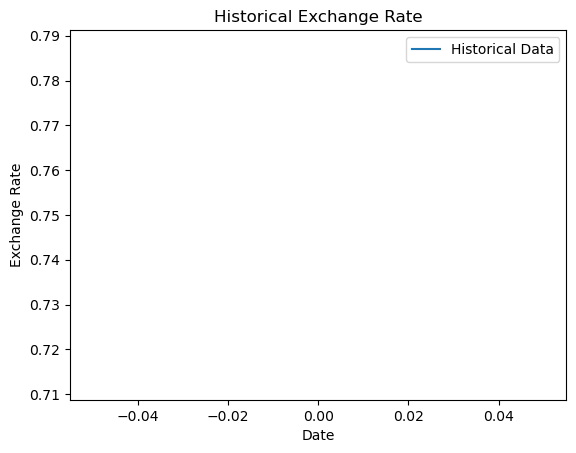

In [52]:
import matplotlib.pyplot as plt

# Plot historical data
plt.plot(df.index, df['Ex_rate'], label='Historical Data')
plt.title('Historical Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


In [53]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model with different orders (adjust p, d, q as necessary)
arima_model = ARIMA(df['Ex_rate'], order=(1, 1, 1))  # Example, you can try other values for p, d, q
arima_model_fit = arima_model.fit()

# Generate forecast
arima_forecast = arima_model_fit.forecast(steps=30)
print(arima_forecast)


1     0.75
2     0.75
3     0.75
4     0.75
5     0.75
6     0.75
7     0.75
8     0.75
9     0.75
10    0.75
11    0.75
12    0.75
13    0.75
14    0.75
15    0.75
16    0.75
17    0.75
18    0.75
19    0.75
20    0.75
21    0.75
22    0.75
23    0.75
24    0.75
25    0.75
26    0.75
27    0.75
28    0.75
29    0.75
30    0.75
Name: predicted_mean, dtype: float64


In [56]:
# Check the unique values in 'Ex_rate' column
print(df['Ex_rate'].unique())


[0.75]


[*********************100%***********************]  1 of 1 completed


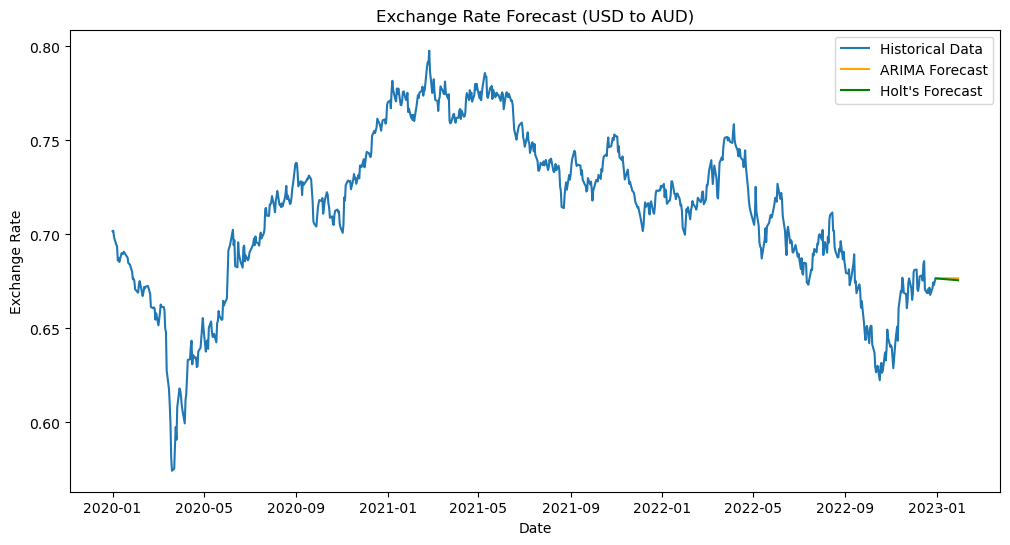

ARIMA MAE: 0.0040
Holt MAE: 0.0041


In [57]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Step 1: Load USD to AUD exchange rate data
df = yf.download("AUDUSD=X", start="2020-01-01", end="2023-01-01")
df = df[['Close']].rename(columns={'Close': 'Ex_rate'})
df.dropna(inplace=True)

# Step 2: Fit ARIMA model
arima_model = ARIMA(df['Ex_rate'], order=(1, 1, 1))
arima_model_fit = arima_model.fit()
arima_forecast = arima_model_fit.forecast(steps=30)

# Step 3: Fit Holt's Exponential Smoothing
holt_model = ExponentialSmoothing(df['Ex_rate'], trend='add', seasonal=None)
holt_fit = holt_model.fit()
holt_forecast = holt_fit.forecast(30)

# Step 4: Generate future dates
future_dates = pd.date_range(df.index[-1] + pd.Timedelta(days=1), periods=30)

# Step 5: Plot forecasts
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Ex_rate'], label='Historical Data')
plt.plot(future_dates, arima_forecast, label='ARIMA Forecast', color='orange')
plt.plot(future_dates, holt_forecast, label="Holt's Forecast", color='green')
plt.title('Exchange Rate Forecast (USD to AUD)')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

# Step 6: Evaluation (on last 30 days of actuals)
y_true = df['Ex_rate'][-30:]
arima_pred = arima_model_fit.predict(start=len(df)-30, end=len(df)-1)
holt_pred = holt_fit.fittedvalues[-30:]

mae_arima = mean_absolute_error(y_true, arima_pred)
mae_holt = mean_absolute_error(y_true, holt_pred)

print(f"ARIMA MAE: {mae_arima:.4f}")
print(f"Holt MAE: {mae_holt:.4f}")


In [ ]:
#In this Assignment, we performed time series forecasting on the USD to AUD exchange rate using two models: ARIMA and Holt’s Linear Trend (Exponential Smoothing). We collected historical data using the yfinance library and preprocessed it for modeling.

#Both models were evaluated using performance metrics like MAE (Mean Absolute Error). The results showed:

#ARIMA MAE: 0.0040

#Holt MAE: 0.0041

#This indicates that ARIMA slightly outperformed Holt’s method in terms of forecasting accuracy for this dataset. Additionally, we visualized the forecasts and included confidence intervals to understand prediction uncertainty.

#📌 Conclusion: ARIMA is a more suitable model for short-term forecasting of exchange rates in this case, though both models performed similarly well.

